In [1]:
# Import libraries for data handling, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
# Load cryptocurrency data and set 'coin_id' as index
df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")
df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [3]:
# View summary statistics for all features
df.describe()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Visualize percentage changes across coins
df.hvplot.line(width=800, height=400, rot=90)


:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [5]:
# Check data types and nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [6]:
# Select numeric columns and scale them
num_cols = df.columns.tolist()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), 
                         columns=num_cols, 
                         index=df.index)
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [7]:
# Confirm data has mean 0 and std 1
df_scaled.describe()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


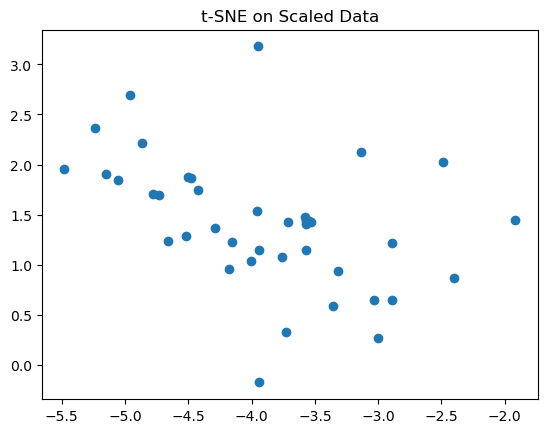

In [8]:
# Visual check for clustering potential (optional)
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled))
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("t-SNE on Scaled Data")
plt.show()


In [9]:
# Loop through k values to find optimal clusters
inertia = []
s_scores = []
vrc_scores = []
k = list(range(2, 10))

for i in k:
    model = KMeans(n_clusters=i, random_state=1)
    model.fit(df_scaled)
    preds = model.predict(df_scaled)
    inertia.append(model.inertia_)
    s_scores.append(silhouette_score(df_scaled, preds))
    vrc_scores.append(calinski_harabasz_score(df_scaled, preds))

# Store results in DataFrame
df_metrics = pd.DataFrame({
    "k": k,
    "inertia": inertia,
    "silhouette": s_scores,
    "vrc": vrc_scores
})
df_metrics


,k,inertia,silhouette,vrc
0,2,212.123342,0.690885,13.766470
1,3,165.136752,0.260810,14.021117
2,4,79.022435,0.314482,32.459853
3,5,66.413051,0.323913,29.892958
4,6,61.634088,0.251616,25.595599
5,7,46.074467,0.258868,29.631263
6,8,43.392694,0.252185,26.466078
7,9,32.913223,0.260185,30.879599


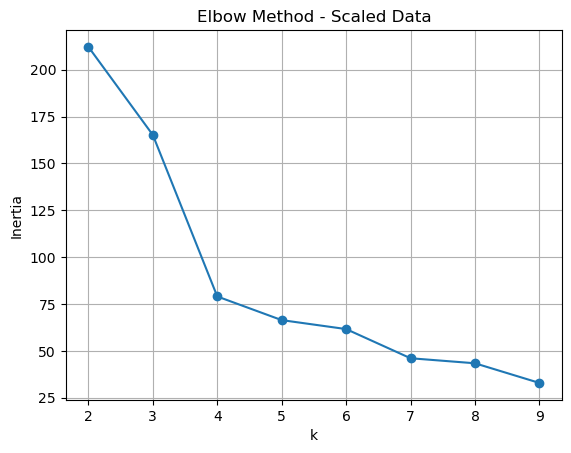

In [10]:
# Plot the elbow curve to find optimal k
plt.plot(df_metrics.k, df_metrics.inertia, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method - Scaled Data")
plt.grid(True)
plt.show()

In [11]:
# Apply KMeans using best k 
kmeans = KMeans(n_clusters=4, random_state=1)
df_scaled["cluster"] = kmeans.fit_predict(df_scaled)
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [12]:
# Scatter plot for clusters based on 2 features
df_scaled.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    title="Clusters on Scaled Data"
)


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [13]:
# Reduce to 3 principal components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_scaled.drop("cluster", axis=1))

# Create PCA DataFrame
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=df.index)
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [14]:
# Show how much variance each PC explains
explained_variance = pca.explained_variance_ratio_
explained_variance, explained_variance.sum()


(array([0.3719856 , 0.34700813, 0.17603793]), 0.8950316570309841)

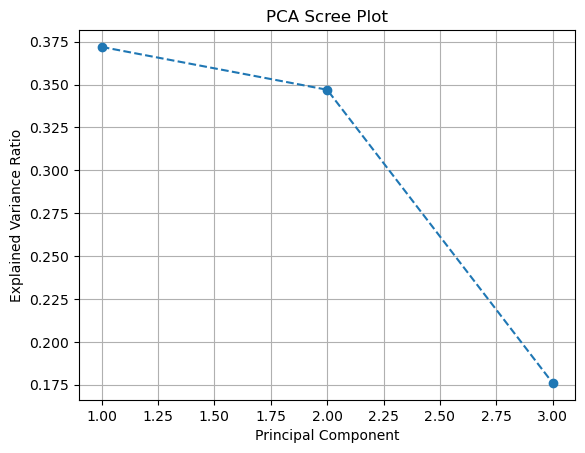

In [15]:
# Plot explained variance by component
plt.plot(range(1, 4), explained_variance, marker='o', linestyle='--')
plt.title("PCA Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


In [16]:
# Repeat elbow method for PCA data
inertia_pca = []
k = list(range(2, 10))

for i in k:
    model = KMeans(n_clusters=i, random_state=1)
    model.fit(df_pca)
    inertia_pca.append(model.inertia_)

# Store results
df_elbow_pca = pd.DataFrame({"k": k, "inertia": inertia_pca})
df_elbow_pca


,k,inertia
0,2,182.339530
1,3,135.442408
2,4,49.665497
3,5,38.672582
4,6,34.507577
5,7,23.728365
6,8,18.574523
7,9,15.572672


In [17]:
# Cluster PCA data with optimal k 
kmeans_pca = KMeans(n_clusters=4, random_state=1)
df_pca["cluster"] = kmeans_pca.fit_predict(df_pca)
df_pca.head()


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [18]:
# Scatter plot for PCA clusters
df_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols=["coin_id"],
    title="Clusters on PCA-Reduced Data"
)


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

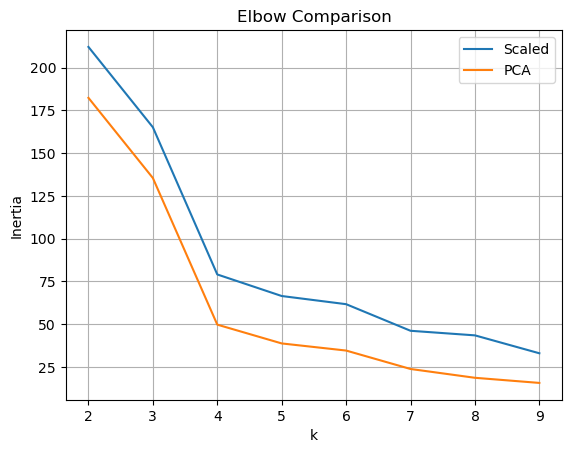

In [19]:
# Compare elbow curves from original and PCA data
plt.plot(df_metrics.k, df_metrics.inertia, label="Scaled")
plt.plot(df_elbow_pca.k, df_elbow_pca.inertia, label="PCA")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Comparison")
plt.legend()
plt.grid(True)
plt.show()


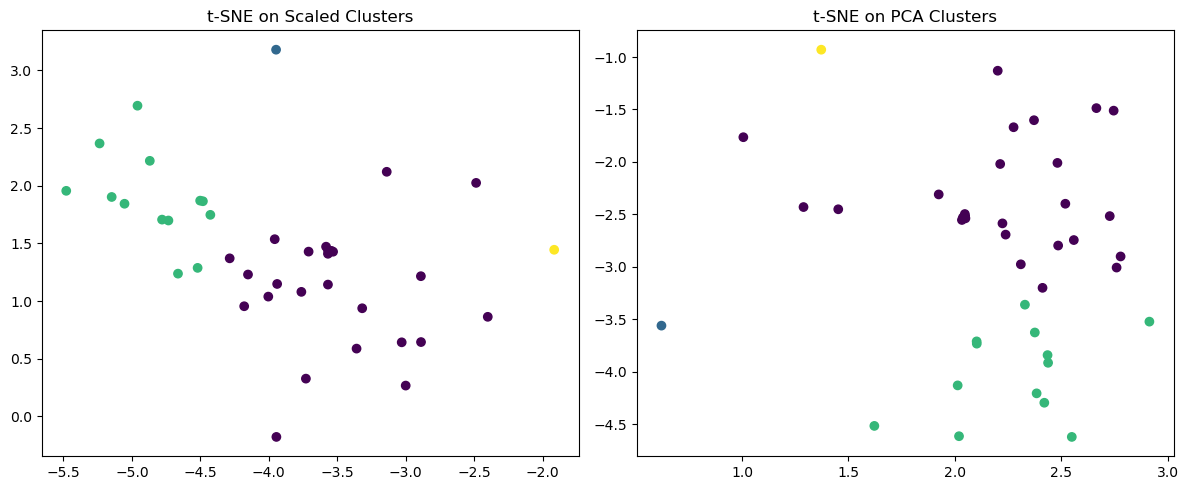

In [20]:
# t-SNE on both for side-by-side comparison
tsne_scaled = TSNE(random_state=42).fit_transform(df_scaled.drop("cluster", axis=1))
tsne_pca = TSNE(random_state=42).fit_transform(df_pca.drop("cluster", axis=1))

plt.figure(figsize=(12, 5))

# Plot t-SNE on scaled
plt.subplot(1, 2, 1)
plt.scatter(tsne_scaled[:, 0], tsne_scaled[:, 1], c=df_scaled["cluster"])
plt.title("t-SNE on Scaled Clusters")

# Plot t-SNE on PCA
plt.subplot(1, 2, 2)
plt.scatter(tsne_pca[:, 0], tsne_pca[:, 1], c=df_pca["cluster"])
plt.title("t-SNE on PCA Clusters")

plt.tight_layout()
plt.show()


In [21]:
#Q1: What is the best value for k (scaled data)?
#Based on the elbow plot and metrics, the best value for k is 4

In [22]:
#Q2: Total explained variance of first 3 PCs?
#The total explained variance is about 89.5%.

In [23]:
#Q3: Does optimal k differ in PCA?
#No, the optimal value for k stays 4.

In [24]:
#Q4: Impact of fewer features in clustering?
#Using fewer features via PCA reduces noise and dimensionality, which can improve clustering performance, interpretability, and visual clarity. However, some detailed information may be lost.